In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#import data
data=pd.read_csv(r"C:\Users\91724\Downloads\Zomato data .csv")
print(data)


                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [5]:
#taking information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [9]:
#top 10
data.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [7]:
# to check to tal no of null values 
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [8]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [10]:
#to convert the data type of column rate
def handle_rate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
data['rate']=data['rate'].apply(handle_rate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Text(0.5, 0, 'type of restaurent')

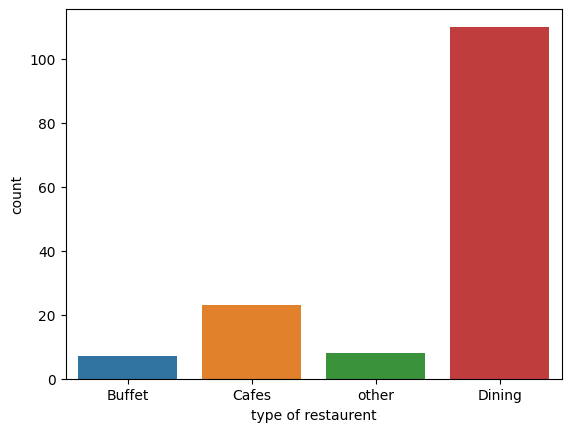

In [12]:
#type of restaurents
sns.countplot(x=data['listed_in(type)'],hue=data['listed_in(type)'])
plt.xlabel('type of restaurent')



***majority of the customers fall in dining category***


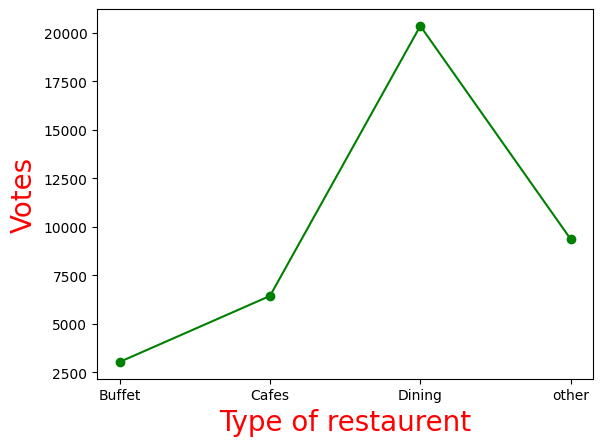

In [14]:
grouped_data=data.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of restaurent",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)
plt.show()

***Dining restaurents have got the most number of votes***

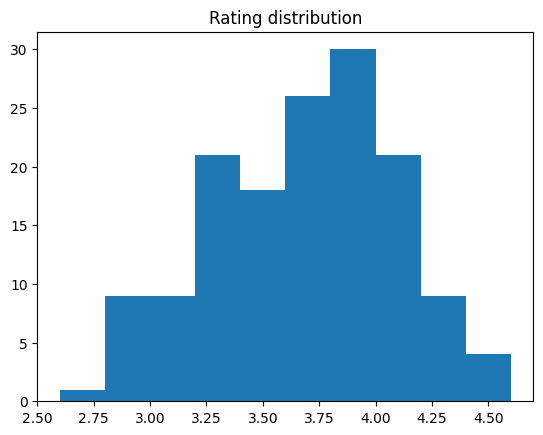

In [18]:
plt.hist(data['rate'],bins=10)
plt.title("Rating distribution")
plt.show()

***Majority restaurents are rated 3.5 to 4***

<Axes: xlabel='online_order', ylabel='rate'>

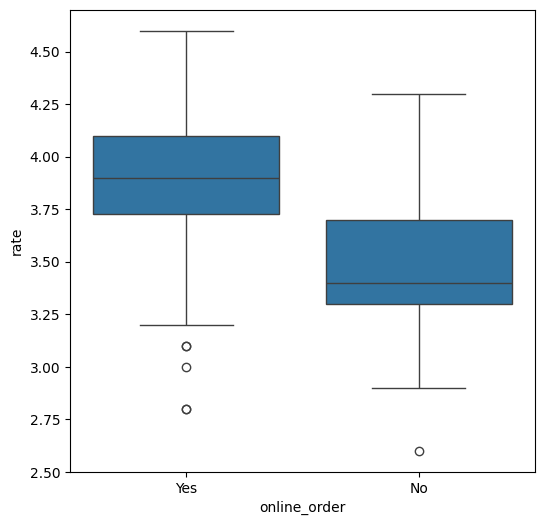

In [23]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

***People give good ratings in online mode and bad ratings in offline mode***

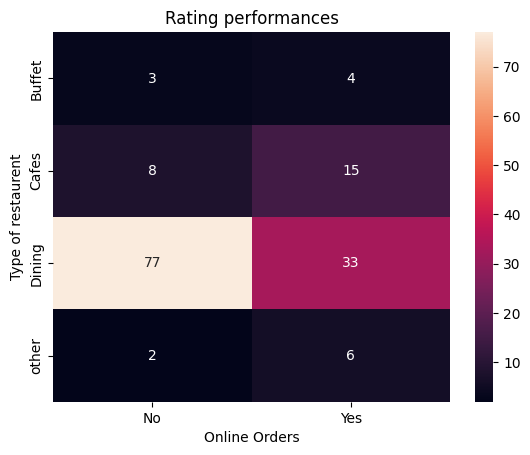

In [37]:
pivot_table=data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='d')
plt.title("Rating performances")
plt.xlabel("Online Orders")
plt.ylabel("Type of restaurent")
plt.show()

***Dining restaurents have mostly offline orders and cafes have mostly online orders***

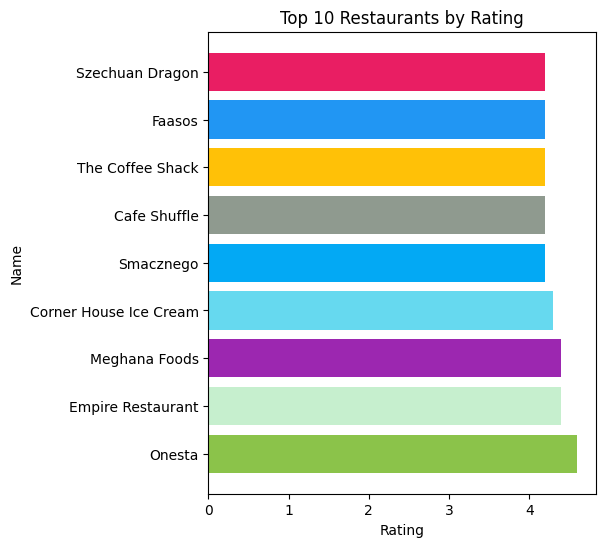

In [34]:
# top 10 restaurants based on ratings
import matplotlib.pyplot as plt
top_restaurants = data.nlargest(10, 'rate')


plt.figure(figsize=(5, 6))
plt.barh(top_restaurants['name'], top_restaurants['rate'],color=['#4CAF50', '#8BC34A', '#C6EFCE', '#9C27B0', '#66D9EF', '#03A9F4', '#8F9A8F', '#FFC107', '#2196F3', '#E91E63'])
plt.xlabel('Rating')
plt.ylabel('Name')
plt.title('Top 10 Restaurants by Rating')
plt.show()

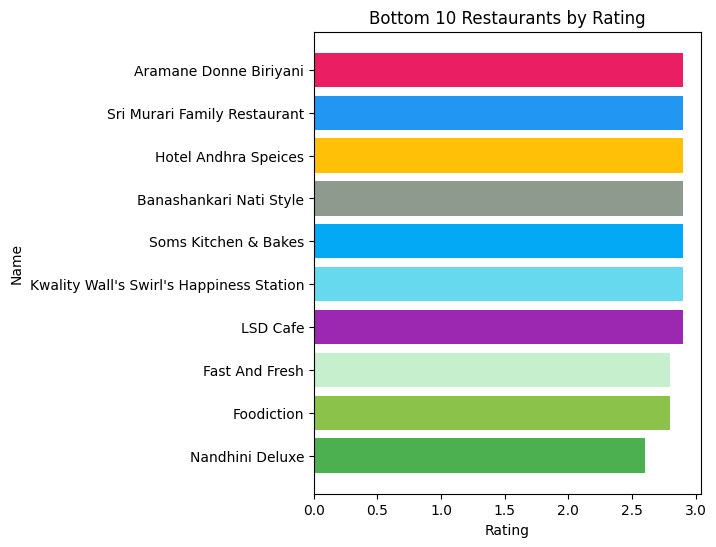

In [36]:
# bottom 10 restaurants based on ratings
import matplotlib.pyplot as plt
top_restaurants = data.nsmallest(10, 'rate')


plt.figure(figsize=(5, 6))
plt.barh(top_restaurants['name'], top_restaurants['rate'],color=['#4CAF50', '#8BC34A', '#C6EFCE', '#9C27B0', '#66D9EF', '#03A9F4', '#8F9A8F', '#FFC107', '#2196F3', '#E91E63'])
plt.xlabel('Rating')
plt.ylabel('Name')
plt.title('Bottom 10 Restaurants by Rating')
plt.show()

***Nandhini Deluxe has the least rating and Onesta has the highest ratings***

Text(0.5, 0, 'Table booked')

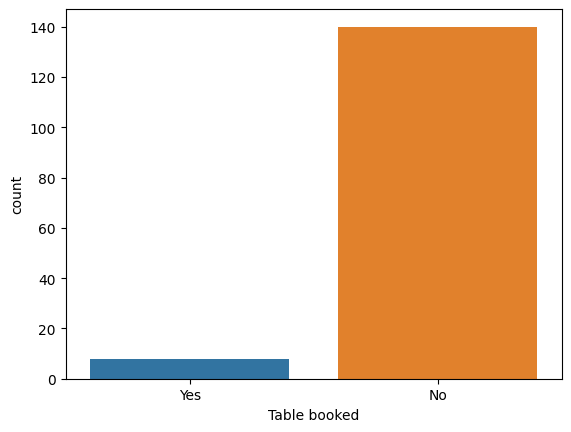

In [35]:
#Number of tables booked
sns.countplot(x=data['book_table'],hue=data['book_table'])
plt.xlabel('Table booked')

***Majority of the customers dont book tables***


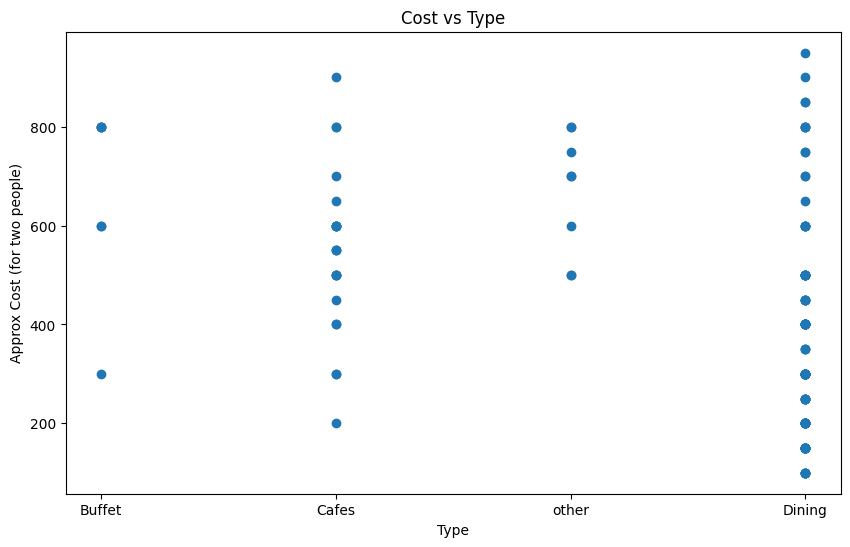

In [38]:
import matplotlib.pyplot as plt

# Create a scatter plot of the cost vs type
plt.figure(figsize=(10, 6))
plt.scatter(data['listed_in(type)'], data['approx_cost(for two people)'])
plt.xlabel('Type')
plt.ylabel('Approx Cost (for two people)')
plt.title('Cost vs Type')
plt.show()

***Money spent is more in cafes and dining. also, the cost varries as-***

***Buffet-250-800 , cafes-190-800+ , other-400-800 , Dining-10-850+***